## Discrete Fourier Transform for Filtering Noisy Signals

We begin with loading necessary packages.

In [110]:
import numpy as np
import matplotlib.pyplot as plt

Now, let us visualize a discrete sample from a signal given by the following function:

$$
f(t) = \sin(2\pi\cdot 50t) + \sin(2\pi\cdot 120t).
$$

We also add a noise, $\varepsilon\sim N(0, 2{.}5^2)$.

First, let's define our signal function:

In [111]:
def f(t):
    return np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

Let's visualize a signal.

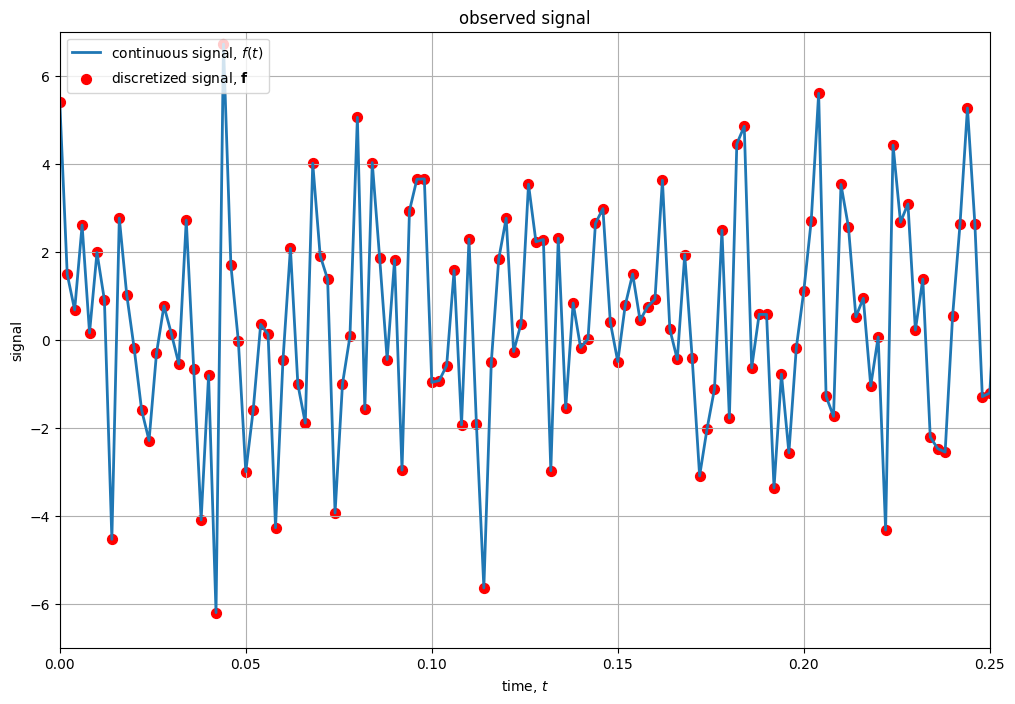

In [112]:
# setting random number generator state
np.random.default_rng(seed=314159)

# step
h = 0.002

# generating (clean) signal data
t = np.arange(0, 1, h)

# number of point
signal = f(t) 

# generating (and adding) noise
n = len(t)
noise = np.random.normal(loc=0, scale=2.5, size=n)
noisy_signal = signal + noise

# plotting
plt.figure(figsize=(12, 8))
plt.plot(t, noisy_signal, linewidth=2, label = r"continuous signal, $f(t)$")
plt.scatter(t, noisy_signal  , s = 50, color = "red", label = r"discretized signal, $\mathbf{f}$")
plt.grid()
plt.xlabel(r"time, $t$")
plt.ylabel(r"signal")
plt.xlim(0, 0.25) # visualizing part of a signal          
plt.ylim(-7, 7)
plt.title(r"observed signal")
plt.legend(loc="upper left")
plt.savefig("figures/lecture03-ex00a.png", dpi = 300)

Now, let's generate and visualize a DFT matrix.

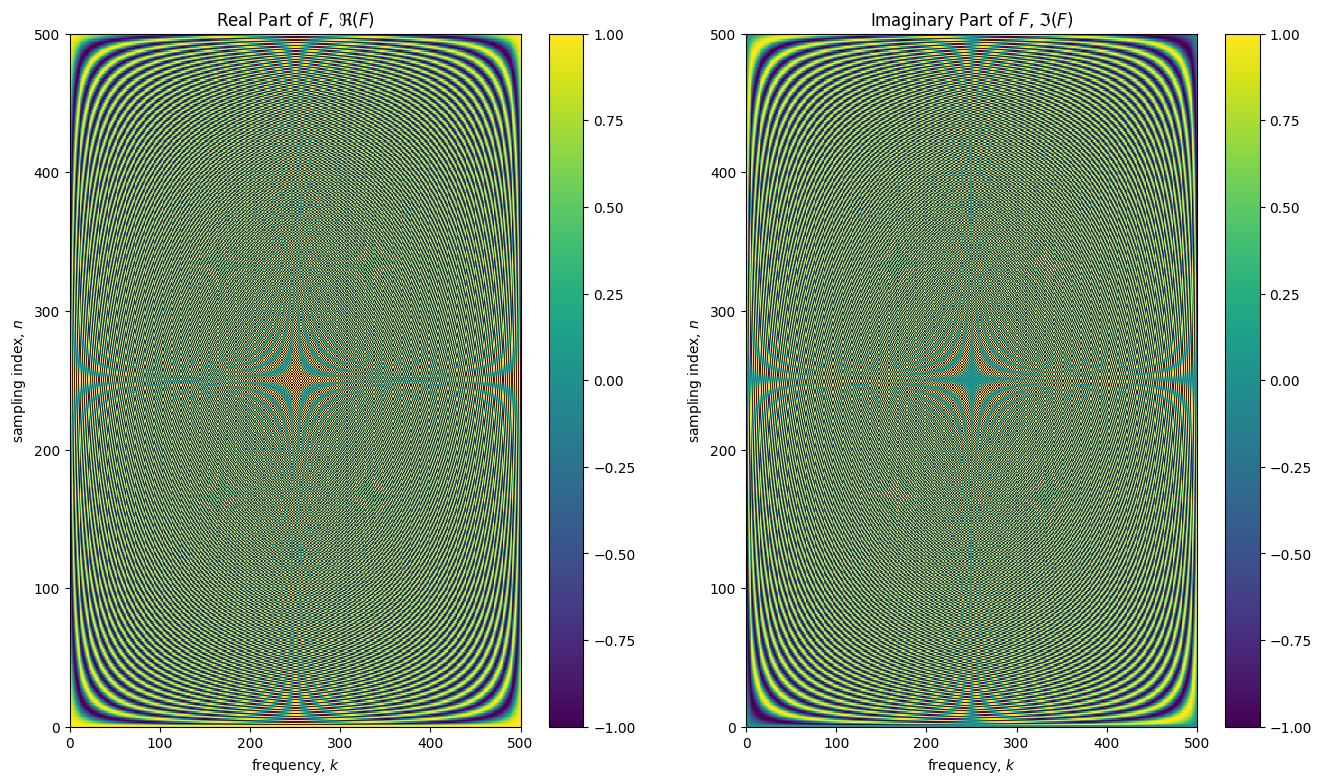

In [113]:
N = n
# create a 2D grid of indices
p, q = np.meshgrid(np.arange(N), np.arange(N))  

# setting omega
omega = np.exp(-1j * 2 * np.pi / N)  

# DFT matrix
F = omega ** (p * q)

# Visualize real and imaginary parts
plt.figure(figsize=(16, 9))

# real part of F: Re(F) 
plt.subplot(1, 2, 1)
plt.pcolormesh(np.real(F), cmap='viridis', shading='auto')
plt.colorbar()
plt.title(r"Real Part of $F$, $\Re(F)$")
plt.xlabel(r"frequency, $k$")
plt.ylabel(r"sampling index, $n$")

# Imaginary part
plt.subplot(1, 2, 2)
plt.pcolormesh(np.imag(F), cmap='viridis', shading='auto')
plt.colorbar()
plt.title(r"Imaginary Part of $F$, $\Im(F)$")
plt.xlabel(r"frequency, $k$")
plt.ylabel(r"sampling index, $n$")

#plt.tight_layout()
plt.savefig("figures/lecture03-ex00b.png", dpi = 300)

### Noise filtering

A signal considered above is noisy. Let's filter the noise by using DFT.

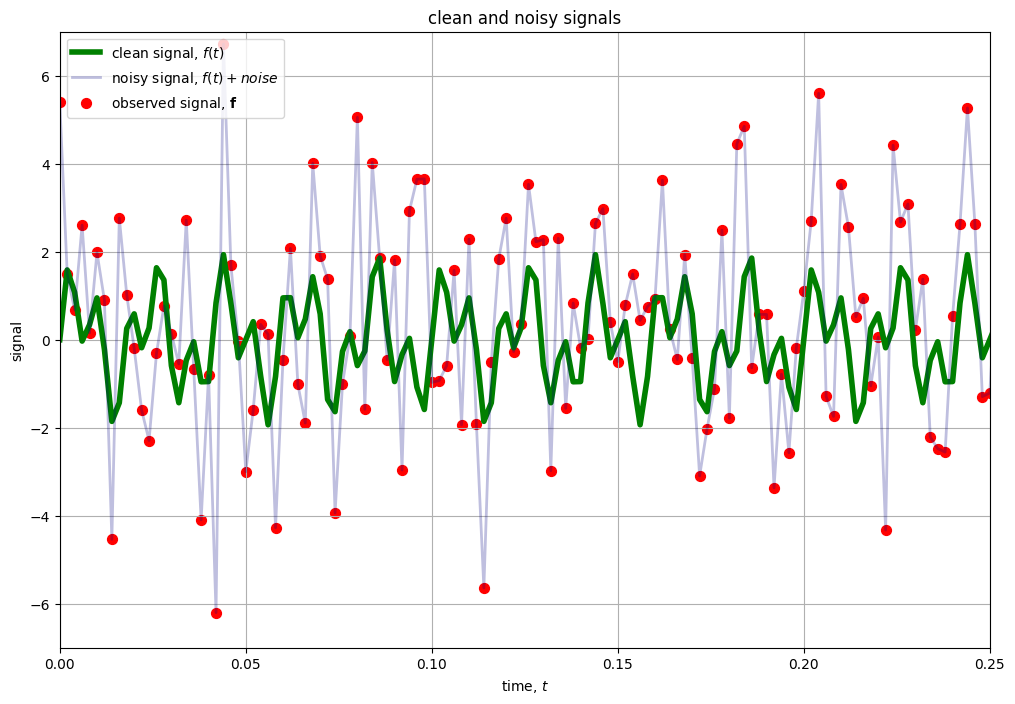

In [114]:
# plotting
plt.figure(figsize=(12, 8))
plt.plot(t, signal, linewidth = 4, color = "green", label = r"clean signal, $f(t)$")
plt.plot(t, noisy_signal, linewidth = 2, alpha = 0.25, color = "navy", label = r"noisy signal, $f(t)+noise$")
plt.scatter(t, noisy_signal, s = 50, color = "red", label = r"observed signal, $\mathbf{f}$")
plt.grid()
plt.xlabel(r"time, $t$")
plt.ylabel(r"signal")
plt.xlim(0, 0.25) # visualizing part of a signal          
plt.ylim(-7, 7)
plt.title(r"clean and noisy signals")
plt.legend(loc="upper left")
plt.savefig("figures/lecture03-ex01a.png", dpi = 300)

Let's apply Fourier transform to the observad signal.

In [115]:
fhat = np.fft.fft(noisy_signal, n)

Now, one can calculate a _Power Spectral Density_ (PSD). PSD is defined as a _squared magnitude_ of the Fourier transform of the signal, normalized by the number of samples, $n$. It quantifies how the signal's power is distributed across frequencies:

$$
PSD[j] = \frac{|\widehat{f}_j|^2}{n},
$$

where $\widehat{f}_j$ is the FFT of the signal. This normalization ensures the PSD represents _**power per frequency bin**_ (units: 
$\frac{\text{V}^2}{\text{Hz}}$ for voltage signals). 

It _**distinguishes high-power frequency components (signal) from low-power components (noise)**_.

1. The FFT _**decomposes the signal into its frequency components**_.
2. The PSD _**identifies which frequencies contribute significant power**_ (signal) versus those that don’t (noise).
    - The noise _**has low power**_ spread uniformly across many frequencies.
    - True signals _**have concentrated power at specific frequencies**_.
3. By _**zeroing PSD components below a threshold**_, the _**noise is suppressed while preserving high-power signal components**_.

Let's calculate PSD and visualize it.

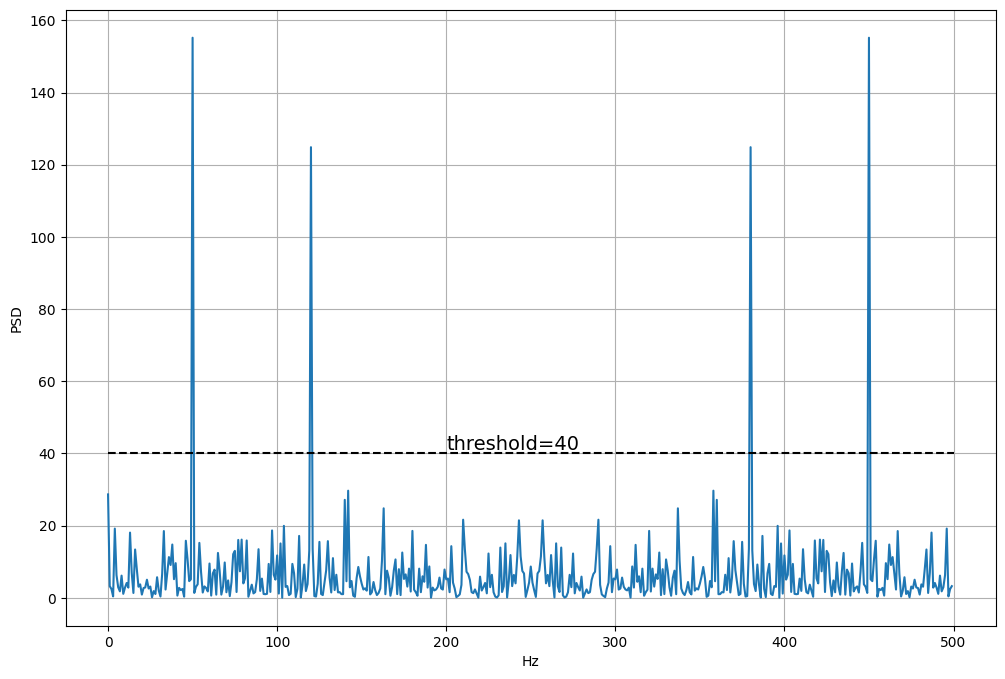

In [116]:
PSD = fhat * np.conj(fhat) / n
PSD = np.real(PSD)

# setting a threshold
threshold = 40
plt.figure(figsize=(12, 8))
plt.plot(PSD)
plt.hlines(threshold, 0, 500, color = "black", linestyle = "--")
plt.text(200, threshold+1, "threshold={}".format(threshold), fontsize=14)
plt.grid()
plt.xlabel("Hz")
plt.ylabel("PSD")
plt.savefig("figures/lecture03-ex01b.png", dpi = 300)

Let's filter a signal by _**zeroing PSD components below a threshold=30**_ and applying an inverse FFT. 

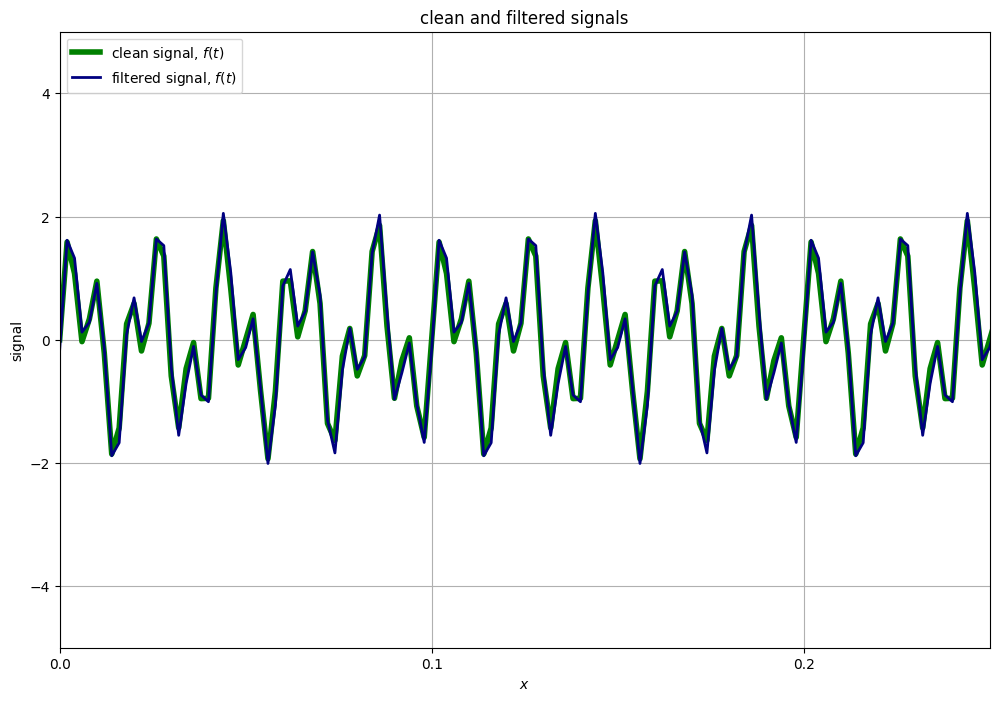

In [117]:
remove = PSD > threshold
ifhat = np.fft.ifft(remove * fhat)
ifhat = np.real(ifhat)

# plotting
plt.figure(figsize=(12, 8))
plt.plot(t, signal, linewidth = 4, color = "green", label = r"clean signal, $f(t)$")
plt.plot(t, ifhat, linewidth = 2, color = "navy", label = r"filtered signal, $f(t)$")
#plt.scatter(x, fn  , s = 50, color = "red", label = r"noisy observations, $\mathbf{f}$")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"signal")
plt.xticks(np.linspace(0, 1, 11))
plt.ylim(-5, 5)
plt.xlim(0, 0.25)
plt.title(r"clean and filtered signals")
plt.legend(loc="upper left")
plt.savefig("figures/lecture03-ex01c.png", dpi = 300)